![Logo 01](https://staff.utia.cas.cz/novozada/dizo/DIZO001_f.png)

**Course website:** [http://zoi.utia.cas.cz/NPGR032](http://zoi.utia.cas.cz/NPGR032)


# Part 0: Imports Packages & Data & Helper Functions


In [2]:
import requests
import zipfile
import os
import errno
import cv2 as cv
# For showing the images in Colab use wrap function cv2_imshow
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import itertools
import os
from IPython import display
import math
import scipy
import warnings
warnings.filterwarnings("ignore")

filename = 'DIZO001_data.zip'
url = f'http://staff.utia.cas.cz/novozada/dizo/{filename}'
try:  
    os.mkdir(f'{filename[:-4]}')    
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("")        
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
    else:
        print(f'{filename[:-4]} folder already exists!')

def resize(img, height=200, interpolation=cv.INTER_CUBIC):
  scale = height / img.shape[0]
  width = int(img.shape[1] * scale)
  new_size = (width, height)  
  return cv.resize(img, new_size, interpolation = interpolation)

def show(img, height=200, interpolation=cv.INTER_CUBIC):  
  img_new = resize(img, height, interpolation = interpolation)  
  cv2_imshow(img_new)

def show_more(height, *args):
    img_new = cv.hconcat([resize(img, height).astype(float) for img in args])
    cv2_imshow(img_new)

def getFilenames(exts):
    fnames = [glob.glob(ext) for ext in exts]
    fnames = list(itertools.chain.from_iterable(fnames))
    fnames.sort()
    return fnames

# Part 1: Labs Orientation


## Schedule:
- Colab & GitHub & Python Crash Course
- Basic Image Manipulation
- Fourier Transform
- Homework

**Attendence:** 

Absence maximum 25% (one lab lesson) - an apology in advance
<br /><br />
Attendance consists of:
1.   Being present during the Lab session - on ZOOM (**<font color='red'>turning on the camera is required - get one</font>**)
2.   Ask questions or comments during the exercise (if you have one) >> for further questions - send me an e-mail 
3.   Finish all excercises (✍🏼)
4.   Save changes to GitHub (within 14 days)



# Part 2: Colab

<a href="https://colab.research.google.com/"><img src="https://staff.utia.cas.cz/novozada/ml1/colab_logo.png"
 align="right"></a>There are several benefits of using Colab over using your own local machines:

* You do not require to do an [environment setup](https://docs.conda.io/projects/conda/en/latest/index.html).
* Browser-based [Jupyter Notebooks](https://jupyter.org/) with important [packages](https://pypi.org/) pre-installed
* Document code with [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
* Load Data from (and save to) [Local Drive and Google Drive](https://colab.research.google.com/notebooks/io.ipynb)
* Importing [Notebooks from Github](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#scrollTo=K-NVg7RjyeTk)
* [Sharing](https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm) with others
* [Free GPU](https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm) (not needed at the exercises)

[How to use colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

[Check one of the many youtube tutorials.](https://www.youtube.com/watch?v=RLYoEyIHL6A)

[A Complete guide to Google Colab for Deep Learning](https://www.kdnuggets.com/2020/06/google-colab-deep-learning.html)

[Advanced Google Colab Tips](https://amitness.com/2020/06/google-colaboratory-tips/)




# Part 3: GitHub

**What is Git?**

Git is the most commonly used version control system. Git tracks the changes you make to files, so you have a record of what has been done, and you can revert to specific versions should you ever need to. Git also makes collaboration easier, allowing changes by multiple people to all be merged into one source. 

<img src="https://staff.utia.cas.cz/novozada/ml1/git.png">

**What is GitHub?**

<a href="https://github.com/"><img src="https://staff.utia.cas.cz/novozada/ml1/github_logo.png"
 align="right"></a>
GitHub is a code hosting platform for version control and collaboration. It lets you and others work together on projects from anywhere.

[What is GitHub?](https://www.youtube.com/watch?v=w3jLJU7DT5E)

[Start using GitHub.](https://guides.github.com/activities/hello-world/)

[Create a repo.](https://docs.github.com/en/get-started/quickstart/create-a-repo)



# Part 4: Python Crash Course

## Python
*   high-level, object-oriented, general purpose programming language
*   open source (free to use and distribute, including for commercial purposes)
*   interpreted (no need to compile the code)
*   simple-to-learn syntax and excellent readability
*   large community
*   numerous libraries for scientific computing

**You should know**
* [Python code structure, variables, functions, conditions, loops](https://coobas.gitlab.io/python-fjfi/en/posts/zakladni-syntaxe.html)
* [Containers: tuple, list, set, dict](https://coobas.gitlab.io/python-fjfi/en/posts/kontejnery.html)
* [Object oriented programming](https://coobas.gitlab.io/python-fjfi/en/posts/objektove-orientovane-programovani.html)
* Packages: [Numpy](https://coobas.gitlab.io/python-fjfi/en/posts/zaklady-numpy.html), [Matplotlib](https://coobas.gitlab.io/python-fjfi/posts/matplotlib.html)

**Learn Python**
* [FJFI Python Tutorial](https://coobas.gitlab.io/python-fjfi/)
* [Introduction to Python](https://pythonprogramming.net/introduction-learn-python-3-tutorials/)
* [Intermediate Python Programming introduction](https://pythonprogramming.net/introduction-intermediate-python-tutorial/)
* [Python cheat sheet](https://websitesetup.org/wp-content/uploads/2021/04/Python-cheat-sheet-April-2021.pdf)
* [Sharpen your python skills on CodeWars](https://www.codewars.com)

**Basic reference sheet**
* [HERE](http://staff.utia.cas.cz/novozada/ML/python3_reference_sheet.pdf)


### Variable assignment and basic operations

assign number $ 4 $ to variable $ x $ and print the value of $ x $:

In [ ]:
x = 4
print(x) 


4


print the type of variable $ x $ using the [`type`](https://docs.python.org/3/library/functions.html#type) function:

In [ ]:
type(x)

int

single-line comments:

In [ ]:
# this is a single-line comment

assign number $ 2 $ to variable $ a $, assign number $ 4 $ to variable $ b $, and print sum, difference, product, and quotient of both variables:

In [ ]:
a = 2
b = 4 
print(a + b, a - b, a * b, a / b)

6 -2 8 0.5


assign number $ 2 $ to variable $ c $ and print square-root of $ c $ and $ c $ to the power of $ 2 $ using the `**` operator:

In [ ]:
c = 2 
print(c**0.5, c**2) 

1.4142135623730951 4


create a list $ l $ of $ 1 $, $ 2.0 $, $ 3 $, and $ c $ (lists can contain any type of variable) and print the content of $ l $:

In [ ]:
l = [1, 2.0, 3, "c"]
print(l) 

[1, 2.0, 3, 'c']


### Conditions

check if $ x $ is equal to $ 4 $, check if $ x $ is not equal to $ 3 $ using the operators `==` and `!=`:

In [ ]:
print(x == 4, x != 3)

True True


check if $ x $ is greater than $ 1 $ and less than $ 3 $, check if $ x $ is equal to $ 3 $ or $ 4 $ using the operators `and` and `or`:

In [ ]:
print(x > 1 and x < 3, x == 3 or x == 4)

False True


if the value of variable $ x $ is less than or equal to $ 3 $, print "x <= 3", if the value of variable $ x $ is greater than $ 3 $ and less than $ 5 $, print "3 < x < 5", else print "x >= 5" using the [`if`](https://docs.python.org/3/reference/compound_stmts.html#if), [`elif`](https://docs.python.org/3/reference/compound_stmts.html#elif), and [`else`](https://docs.python.org/3/reference/compound_stmts.html#else) statements (note that in Python the code blocks must be indented - both tabs and spaces are supported):

In [ ]:
if x <= 3:
    print("x <= 3") 
elif x > 3 and x < 5: 
    print("3 < x < 5")
else: 
    print("x >= 5")

3 < x < 5


use the `in` operator to check if the list $ l $ contains character $ c $:

In [ ]:
print(l)
print("c" in l)

[1, 2.0, 3, 'c']
True


use the `in` and `not` operators to check if the number 4 is not in the list $ l $:

In [ ]:
print(4 not in l)

True


### Loops

print the sequence of numbers from 0 to 2 using the [`range`](https://docs.python.org/3/library/stdtypes.html#range) function and [`for`](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement) loop (note that the [`range`](https://docs.python.org/3/library/stdtypes.html#range) function is zero based):

In [ ]:
for i in range(3):
    print(i)

0
1
2


print the sequence of numbers from $ 3 $ to $ 5 $:

In [ ]:
for i in range(3, 6):
    print(i)

3
4
5


iterate over a sequence given by list:

In [ ]:
for x in [1,5,4]:
    print(x)

1
5
4


[`while`](https://docs.python.org/3/reference/compound_stmts.html#while) loops repeat as long as a certain boolean condition is met (note that the [`else`](https://docs.python.org/3/reference/compound_stmts.html#else) clause can be used in loops):

In [ ]:
k = 10
while k > 5:
    print("k =", k)
    k = k - 1 # or k -= 1
else:
    print("k <= 5")

k = 10
k = 9
k = 8
k = 7
k = 6
k <= 5


### Functions

define a function that takes two numbers and returns their product using the `def` keyword:

In [ ]:
def multiply(x, y):
    return x*y

print(multiply(2, 415))

830


use the [`try`](https://docs.python.org/3/reference/compound_stmts.html#try) and [`except`](https://docs.python.org/3/reference/compound_stmts.html#except) statements to catch the error thrown by `multiply` function when multiplying two strings:

In [ ]:
try:
    print(multiply("a", "b"))

except Exception as e:
    print("Caught an exception: " + str(e))

Caught an exception: can't multiply sequence by non-int of type 'str'


redefine the `multiply` function using the `lambda` keyword:

In [ ]:
multiply = lambda x, y: x**y

multiply(2, 3)

8

## Python packages

### Numpy

<img src="https://staff.utia.cas.cz/novozada/ml1/numpy.png"> <br />

import the [`numpy`](https://numpy.org/) module and bind the import to the local variable `np` (to avoid name collisions and shorten module name):

In [ ]:
import numpy as np

print $ \sqrt{4} $, $ \left|-1 \right| $, $ \exp{(1)} $, $ \ln{(e)} $, $ \sin{(\pi)}$, and $ \cos{(\pi)} $ using the functions from [`numpy`](https://numpy.org/) module:

In [ ]:
print(np.sqrt(4), np.abs(-1), np.exp(1), np.log(np.e), np.sin(np.pi), np.cos(np.pi))

2.0 1 2.718281828459045 1.0 1.2246467991473532e-16 -1.0


create a vector $ v $ of numbers from $ 1 $ to $ 9 $ using the [`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function:

In [ ]:
v = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(v)
print([x**2 for x in v])

[1 2 3 4 5 6 7 8 9]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


create a $ 3 \times 3 $ matrix $ \mathbb{M} $ of numbers from $ 1 $ to $ 9 $ using the [`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function:

In [ ]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(M)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


print the dimensions of the vector $ v $ and matrix $ \mathbb{M} $ using the [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) function:

In [ ]:
print(np.shape(v), np.shape(M))

(9,) (3, 3)


print number of elements of the vector $ v $ and matrix $ \mathbb{M} $ using the [`size`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html) function:

In [ ]:
print(np.size(v), np.size(M))

9 9


print the scalar product $ v \cdot v $ using the [`dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function (compare with the element-wise multiplication using the operator `*`):

In [ ]:
print(np.dot(v, v)) # alternatively v @ v
print(v * v)

285
[ 1  4  9 16 25 36 49 64 81]


print the matrix product $ \mathbb{M} \cdot \mathbb{M} $ using the [`dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function (compare with the element-wise multiplication using the operator `*`):

In [ ]:
print(np.dot(M, M))# alternatively M @ M
print(M * M)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


print the first, last, sixth and the penultimate element of vector $ v $:

In [ ]:
print(v)
print(v[0], v[-1], v[5], v[-2])

[1 2 3 4 5 6 7 8 9]
1 9 6 8


print the first five, last four, and each second element of vector $ v $ using the numpy array [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html):

In [ ]:
print(v[:5], v[5:], v[::2])

[1 2 3 4 5] [6 7 8 9] [1 3 5 7 9]


print the $ \mathbb{M}_{0, 0} $ element, the first row, and the second column of matrix $ \mathbb{M} $:

In [ ]:
print(M[0, 0], M[0, :], M[:, 1])

1 [1 2 3] [2 5 8]


create evenly spaced vector $ x $ of size $ 5 $ from $ -2 $ to $ 2 $ using the [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function

In [ ]:
x = np.linspace(-2, 2, 5)
print(x)

[-2. -1.  0.  1.  2.]


create evenly spaced vector $ x $ of size $ 50 $ from $ -2 $ to $ 2 $ using the [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function and print the step size:

In [ ]:
x, h = np.linspace(-2, 2, 50, retstep=True)
print(h)

0.08163265306122448


create evenly spaced vector $ x $ from $ -2 $ to $ 2 $ with a step of size $ 1 $ using the [`arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function: 

In [ ]:
x = np.arange(-2, 3, 1.0)
print(x)

[-2. -1.  0.  1.  2.]


create a matrix from the vector $ x $ using the [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function:

In [ ]:
xx, yy = np.meshgrid(x, x)
print(xx)
print(yy)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


create a vector of zeros of size $ 3 $ using the [`zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) function:

In [ ]:
z = np.zeros(3)
print(z)

[0. 0. 0.]


create a $ 3 \times 3$ matrix of zeros using the [`zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) function:

In [ ]:
Z = np.zeros((3, 3))
print(Z)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


create a $ 3 \times 3 $ matrix with ones on the diagonal and zeros elsewhere using the [`eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) function:

In [ ]:
D = np.eye(3)
print(D)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


create a $ 3 \times 3 $ matrix filled with ones using the [`ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) function:

In [ ]:
O = np.ones((3, 3))
print(O)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


create a $ 3 \times 3 $ matrix filled with random floating point numbers between $ 0 $ and $ 1 $ using the [`rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function:

In [ ]:
R = np.random.rand(3, 3)
print(R)

[[0.55432622 0.35163727 0.41116676]
 [0.31673861 0.8190782  0.61327743]
 [0.13739169 0.71816419 0.49574983]]


create a $ 3 \times 3 $ matrix with the vector $ (1, 2, 3) $ on the diagonal using the [`diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function:

In [ ]:
print(np.diag([1,2,3], 0))

[[1 0 0]
 [0 2 0]
 [0 0 3]]


extract the main diagonal, and the diagonals above and below the main diagonal from matrix $ \mathbb{M} $ using the [`diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function:

In [ ]:
print(np.diag(M, 0), np.diag(M, 1), np.diag(M, -1))

[1 5 9] [2 6] [4 8]


set all elements of matrix $ \mathbb{M} $ below and above diagonal to zero using the [`triu`](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) and [`tril`](https://numpy.org/doc/stable/reference/generated/numpy.tril.html) functions:

In [ ]:
print(np.triu(M))
print(np.tril(M))

[[1 2 3]
 [0 5 6]
 [0 0 9]]
[[1 0 0]
 [4 5 0]
 [7 8 9]]


print minimum and maximum elements, index of minimum and maximum elements, and the sum of vector $ v $ using the [`min`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`max`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), and [`sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) functions:

In [ ]:
print(np.min(v), np.max(v), np.argmin(v), np.argmax(v), np.sum(v))

1 9 0 8 45


print even numbers of vector $ v $ and their indices using the [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html), and [`mod`](https://numpy.org/doc/stable/reference/generated/numpy.mod.html) functions:

In [ ]:
print(v)
even = np.where(np.mod(v, 2) == 0)
print(v[even])

[1 2 3 4 5 6 7 8 9]
[2 4 6 8]


assign vector $ v $ to vector $ v_2 $ using the `=` operator (note that if you modify one in place, you'll see the change through the other one too):

In [ ]:
print(v)
v2 = v
v2[0] = -1
print(v)
print(v2)

[1 2 3 4 5 6 7 8 9]
[-1  2  3  4  5  6  7  8  9]
[-1  2  3  4  5  6  7  8  9]


copy the vector $ v $ to vector $ v_3 $ using the [`copy`](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) function:

In [ ]:
v3 = np.copy(v)
v3[0] = -2
print(v)
print(v3)

[-1  2  3  4  5  6  7  8  9]
[-2  2  3  4  5  6  7  8  9]


create vector $ v_4 $ by appending $ 0 $ to the end of vector $ v $ using the [`append`](https://numpy.org/doc/stable/reference/generated/numpy.append.html) function:

In [ ]:
v4 = np.append(v, 0)
print(v)
print(v4)

[-1  2  3  4  5  6  7  8  9]
[-1  2  3  4  5  6  7  8  9  0]


create vector $ v_5 $ by inserting $ -5 $ as a sixth element to vector $ v $ using the [`insert`](https://numpy.org/doc/stable/reference/generated/numpy.insert.html) function:

In [ ]:
v[5] = -123
print(v)
v5 = np.insert(v, 5, -5)
print(v5)

[  -1    2    3    4    5 -123    7    8    9]
[  -1    2    3    4    5   -5 -123    7    8    9]


create vector $ v_6 $ by concatenating vectors $ v_4 $ and $ v_5 $ using the [`concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function:

In [ ]:
v6 = np.concatenate((v4, v5))
print(v6)

[  -1    2    3    4    5    6    7    8    9    0   -1    2    3    4
    5   -5 -123    7    8    9]


create polynomial $ p = x^3 + 2x^2 + 3x + 2 $ using the [`poly1d`](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) function:

In [ ]:
p = np.poly1d([1, 2, 3, 2])
print(p)

   3     2
1 x + 2 x + 3 x + 2


Further reading: https://numpy.org/doc/stable/reference/

### Matplotlib

<img src="https://staff.utia.cas.cz/novozada/ml1/matplotlib.png"> <br />


import [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) submodule from [`matplotlib`](https://matplotlib.org/) and bind the import to the local variable `plt`:

In [ ]:
import matplotlib.pyplot as plt

plot $ \sin{(x)} $ and $ \cos{(x)} $ functions for $ x \in [0, 10] $ using the [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function:

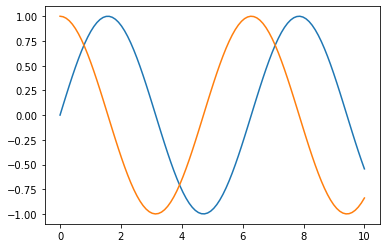

In [ ]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
plt.show()

plot the functions $ y(x) = x $ and $ y(x) = x^2 $ for $ x \in [0, 10] $ and show the plots next to each other:

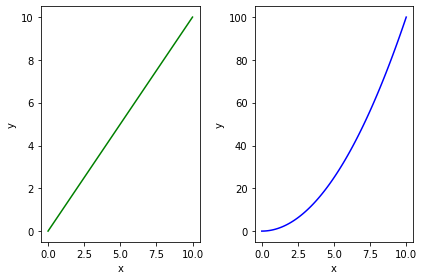

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, x, color="green")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, x**2, color="blue")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
    
fig.tight_layout()
plt.show()

save the figure above as "figure.png":

In [ ]:
fig.savefig("figure.png", dpi=100)

create a 2D plot of Gaussian function, $ f(x, y) = \exp{(-ax^2 - by^2)} $, for $ x, y \in [-2, 2] $ using the [`pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function:

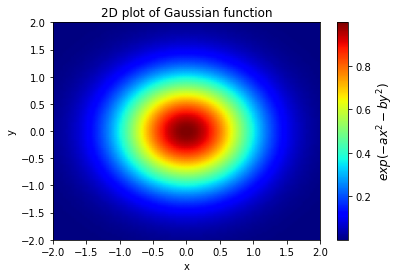

In [ ]:
a = 1 #@param {type:"slider", min:0, max:5, step:0.1}
b = 1 #@param {type:"slider", min:0, max:5, step:0.1}

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)
function = np.exp(-a*xx**2 - b*yy**2)

fig, ax = plt.subplots()
img = ax.pcolormesh(x, y, function, cmap="jet", shading="gouraud")
ax.set_title("2D plot of Gaussian function")
ax.set_xlabel("x")
ax.set_ylabel("y")

cbar = plt.colorbar(img)
cbar.set_label(label=r"$ exp(-ax^2 - by^2) $", fontsize=12)

plt.show()

Further reading: https://matplotlib.org/

### OpenCV

<img src="https://staff.utia.cas.cz/novozada/dizo/opencv.png"> <br />


# Part 5: Basic Image Manipulation


## Reading + Showing + Saving + Images

Load and show an image

Image Properties
- Number of Pixels: 786432
- Shape/Dimensions: (512, 512, 3)


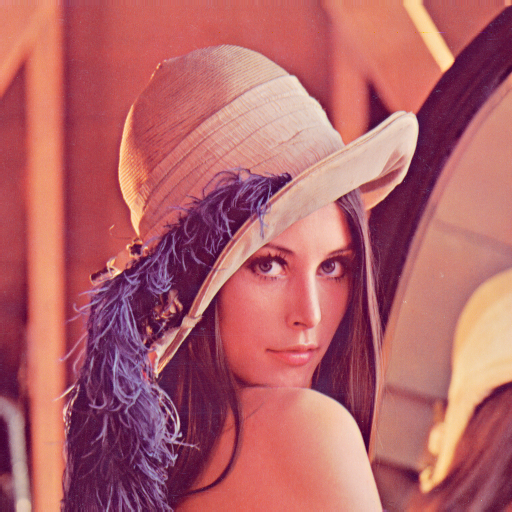

In [ ]:
# read the Image 'lena.
img = cv.imread('lena.png')
# print some basic properties of the image
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

cv2_imshow(img)

Too big? Use our help script for showing the image with different sizes.

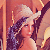

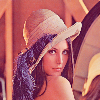

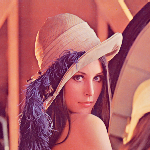

In [ ]:
for size in range(50, 200, 50):
  show(img,size)

Read, flip left to right and save the image

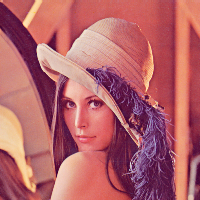

In [ ]:
# read the Image 'lena.
img = cv.imread('lena.png')
img_out = img[:,::-1]
cv.imwrite('lena_out.png', img_out)
show(img_out)

## Playing with Channels and Pixels  

### Work with color channels



Implementing the Max RGB filter
*   Split the image to the three channels
*   For each pixel find the maximum value of $r$, $g$, and $b: m = max(r, g, b)$    
*   If $g < m: g = 0$
*   If $r < m: r = 0$
*   If $b < m: b = 0$
*   Store the $r$, $g$, and $b$ values back in image: $I[x, y] = (r, g, b)$

Try with ***us163.png*** 

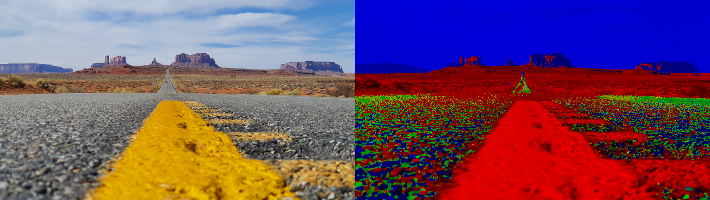

In [ ]:
def max_rgb_filter(img):
  # split channels
  b, g, r = cv.split(img)

  # find the maximum pixel intensity values for each pixel
  m = np.maximum(np.maximum(r, g), b)
  r[r < m] = 0
  g[g < m] = 0
  b[b < m] = 0
  # merge the channels back together and return the image
  return cv.merge([b, g, r])  

img = cv.imread('us163.png')

show_more(200, img, max_rgb_filter(img))


### Work with pixels

*   Select the central rectangle $(m, n)$, where $m = height(I)/2$ and $n = width(I)/2$
*   Transform pixels inside the rectangle to grayscale
*   Double the value of even rows outside the rectangle

Try with ***lena.png***

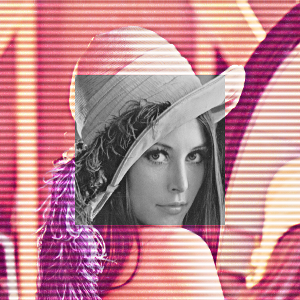

--- Processing: 0.1016881466 seconds ---


In [ ]:
img = cv.imread('lena.png')
h = img.shape[0]
w = img.shape[1]
start_time = time.time()
# get the central rectangle in grayscale
gray = cv.cvtColor(img[int(h/4):int(3*h/4), int(w/4):int(3*w/4)], cv.COLOR_BGR2GRAY)

# double the value
img[1::2]=cv.convertScaleAbs(img[1::2], alpha=2, beta=0)

# save the gray values to the central rectangle
img[int(h/4):int(3*h/4), int(w/4):int(3*w/4)] = cv.merge((gray, gray, gray))
show(img, 300)
print(f"--- Processing: {time.time() - start_time:.10f} seconds ---")

Increasing value - time comparison:

--- Processing: 16.4069845676 seconds ---
--- Processing: 0.0006606579 seconds ---


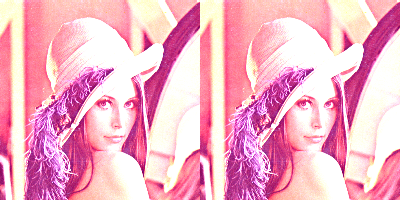

0

In [ ]:
img = cv.imread('lena.png')
h = img.shape[0]
w = img.shape[1]
channels = img.shape[2]
img_out = np.zeros(img.shape, img.dtype)
start_time = time.time()
for y in range(h):
    for x in range(w):
        for c in range(channels):
            img_out[y,x,c] = np.clip(2*img[y,x,c],0,255)
print(f"--- Processing: {time.time()-start_time:.10f} seconds ---")

start_time = time.time()
img_out2 = cv.convertScaleAbs(img, alpha=2, beta=0)
print(f"--- Processing: {time.time()-start_time:.10f} seconds ---")
show_more(200, img_out, img_out2)
np.max(img_out - img_out2)

An interesting difference in time consumption, huh?

**rgb2gray**

*   Write your own transformation from RGB image to Gray
*   Compare the speed with cv2.cvtColor()

Try with ***lena.png***

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/rgb.png)

- np.dot: 0.010327 sec -
- handwritten: 0.002954 sec -
- cv.cvtColor: 0.000374 sec -
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.2204 0.2204 0.2357]
 [0.2204 0.2204 0.2357]
 [0.2204 0.2204 0.2357]]


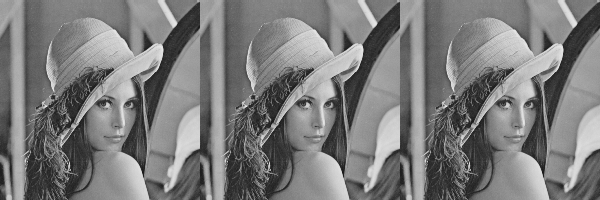

In [ ]:
img = cv.imread('lena.png')
b, g, r = cv.split(img)
# [r, g, b] coefficients
rgb_weights = [0.2989, 0.5870, 0.1140]
# dot product
stime = time.time()
gray0 = np.dot(img[...,::-1], rgb_weights)
print(f"- np.dot: {time.time() - stime:.6f} sec -")
# handwritten version
stime = time.time()
gray1 = r * rgb_weights[0] + g * rgb_weights[1] + b * rgb_weights[2]
print(f"- handwritten: {time.time() - stime:.6f} sec -")
stime = time.time()
gray2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(f"- cv.cvtColor: {time.time() - stime:.6f} sec -")
gg = (gray0 - gray1)
print((gg[0:3, 0:3]))
gg = (gray0 - gray2)
print((gg[0:3, 0:3]))
show_more(200, gray0, gray1, gray2)

### Work with matrix indexing

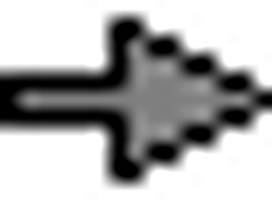

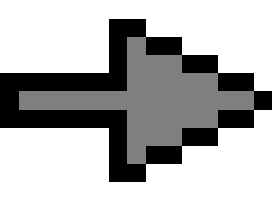

In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
show(img)
show(img, interpolation=cv.INTER_NEAREST)

Find the black contour of the arrow and delete it:

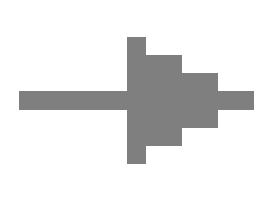

In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
img[img == 0] = 255
show(img, interpolation=cv.INTER_NEAREST)

Calculate the contour length of the arrow:
-   'Contour length' means the number of black pixels


In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
length = np.sum(img == 0)
print(f"Contour length: {length} pixels")

Contour length: 36 pixels


**Find the binary and grayscale center of gravity of the arrows:**

**Binary:**

-   All pixels have weight 1, except background  (value 255) >> these have weight 0

**Grayscale:**
-   The value of intensity is the weight of this pixel:
       - Black pixels (value 0) >> weight 0
       - White pixels (value 255) >> weight 255

In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
[y, x] = np.where(img < 255);
cxb = np.mean(x)
cyb = np.mean(y)
print(f"Binary center of gravity: [x, y] =[{cxb+1:.3f}, {cyb+1:.3f}]")

cxg = np.dot(np.sum(img,0), range(img.shape[1])) /  np.sum(img);
cyg = np.dot(np.sum(img,1), range(img.shape[0])) /  np.sum(img);
print(f"Grayscale center of gravity: [x, y] = [{cxg+1:.3f},{cyg+1:.3f}]")

Binary center of gravity: [x, y] =[8.090, 6.000]
Grayscale center of gravity: [x, y] = [8.061,6.000]


**Create the same grayscale collage** with ***lena.png*** image
-   With and without the OpenCV or NumPy functions
-   Compare the computational speed 

![Collage](https://staff.utia.cas.cz/novozada/dizo/collage4.png)

handwritten: 0.001451 sec
np.flip: 0.001317 sec
cv2.vconcat: 0.001932 sec


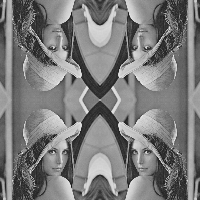

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
stime = time.time() 
ul = img[::-1]
ur = ul[:,::-1]
dl = img
dr = dl[:,::-1]
img_new1 = np.concatenate((np.concatenate((ul, ur), axis=1),\
            np.concatenate((dl, dr), axis=1)), axis=0)
print(f"handwritten: {time.time()-stime:.6f} sec")

stime = time.time()
ul = np.flipud(img)
ur = np.fliplr(ul)
dl = img
dr = np.fliplr(dl)
img_new2 = np.concatenate((np.concatenate((ul, ur), axis=1),\
            np.concatenate((dl, dr), axis=1)), axis=0)
print(f"np.flip: {time.time()-stime:.6f} sec")

stime = time.time()
ul = cv.flip(img,0)
ur = cv.flip(ul,1)
dl = img
dr = cv.flip(dl,1)
img_new3 = cv.vconcat([cv.hconcat([ul, ur]),\
                       cv.hconcat([dl, dr])])
print(f"cv2.vconcat: {time.time()-stime:.6f} sec")

show(img_new1)
# show(img_new2)
# show(img_new3)

**Resize the** ***lena.png*** image to the half size in both directions
-   With and without the OpenCV or NumPy functions
-   Compare the computational speed 

Image Properties - original
- Number of Pixels: 786432
- Shape/Dimensions: (512, 512, 3)

Image Properties - cv2.resize():
- Number of Pixels: 196608
- Shape/Dimensions: (256, 256, 3)
cv2.resize: 0.002344 sec

Image Properties - handwritten:
- Number of Pixels: 196608
- Shape/Dimensions: (256, 256, 3)
handwritten: 0.001638 sec


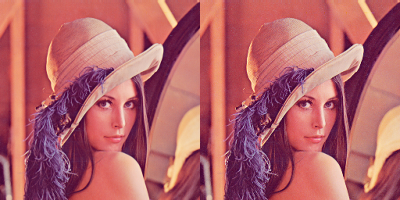

In [ ]:
img = cv.imread('lena.png')
print("Image Properties - original")
print(f"- Number of Pixels: {img.size}")
print(f"- Shape/Dimensions: {img.shape}\n")

stime = time.time()
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
imgCV = cv.resize(img, dim)
print("Image Properties - cv2.resize():")
print(f"- Number of Pixels: {imgCV.size}")
print(f"- Shape/Dimensions: {imgCV.shape}")
print(f"cv2.resize: {time.time()-stime:.6f} sec\n")

stime = time.time()
imgHW = img[::2,::2]
print("Image Properties - handwritten:")
print(f"- Number of Pixels: {imgHW.size}")
print(f"- Shape/Dimensions: {imgHW.shape}")
print(f"handwritten: {time.time()-stime:.6f} sec")
show_more(200, imgCV, imgHW)

**Alpha blending**

Do alpha blending with OpenCV
-   Input image 1 – ***flags/Portugal.png***
-   Input image 2 – ***flags/Czech_Republic.png***

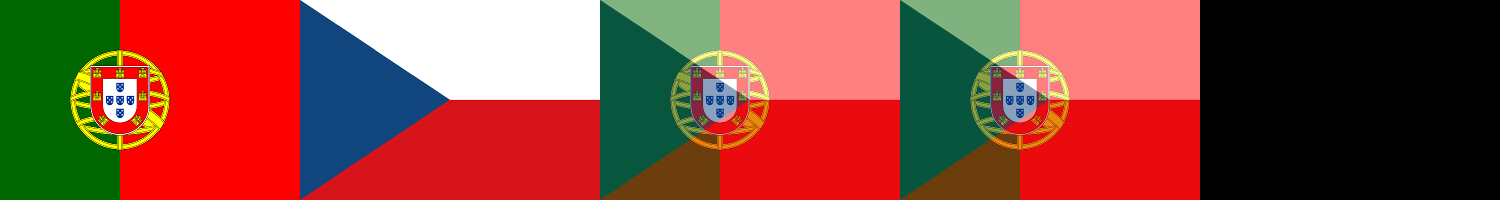

Max diff = 0.3


In [ ]:
img1 = cv.imread('flags/Portugal.png')
img2 = cv.imread('flags/Czech_Republic.png')
img2 = cv.resize(img2, img1.shape[1::-1])
alpha = 0.5
beta = 0.5
gamma = 0.2
imgO1 = cv.addWeighted(img1, alpha, img2, beta, gamma)
imgO2 = img1 * alpha + img2 * beta + gamma
show_more(200, img1, img2, imgO1, imgO2, np.abs(imgO1 - imgO2))
print(f"Max diff = {np.max(np.abs(imgO1-imgO2)):.2}")

### Thresholding

*   Try different type of thresholding in OpenCV and find their equivalent in matrix indexing

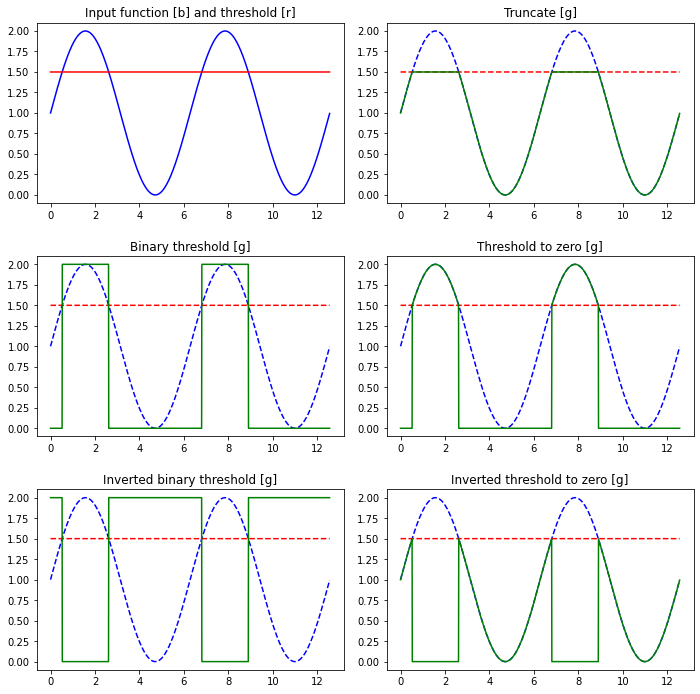

In [ ]:
thresh = 1.5

x = np.arange(0, 4 * np.pi, 0.01)
t = x * 0 + thresh
y = np.sin(x) + 1;

yBinary = np.copy(y)
yBinaryInv = np.copy(y)
yTrunc = np.copy(y)
yToZero = np.copy(y)
yToZeroInv = np.copy(y)

yBinary[y<thresh] = 0
yBinary[y>=thresh] = 2

yBinaryInv[y>=thresh] = 0
yBinaryInv[y<thresh] = 2

yToZero[y<thresh] = 0
yToZeroInv[y>=thresh] = 0

yTrunc[y>=thresh] = thresh

fig = plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.plot(x, y, 'b')
plt.plot(x, t, 'r')
plt.title('Input function [b] and threshold [r]')

plt.subplot(3,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yTrunc, 'g')
plt.title('Truncate [g]')

plt.subplot(3,2,3)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinary, 'g')
plt.title('Binary threshold [g]')

plt.subplot(3,2,4)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZero, 'g')
plt.title('Threshold to zero [g]')

plt.subplot(3,2,5)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinaryInv, 'g')
plt.title('Inverted binary threshold [g]')

plt.subplot(3,2,6)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZeroInv, 'g')
plt.title('Inverted threshold to zero [g]')
plt.tight_layout(pad=2.0)
plt.show()

Thresholding – **Binary Threshold & Binary Threshold**

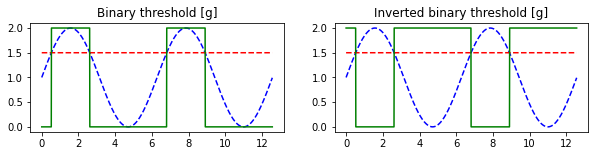

In [ ]:
fig = plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinary, 'g')
plt.title('Binary threshold [g]');
plt.subplot(1,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinaryInv, 'g')
plt.title('Inverted binary threshold [g]');

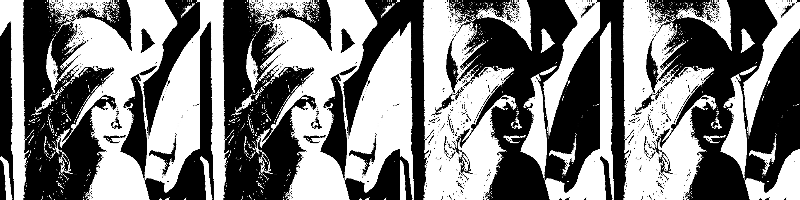

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_BINARY)
_, imgThreshCV_inv = cv.threshold(img,thresh,max_value,cv.THRESH_BINARY_INV)
imgThreshHW = np.copy(img)
imgThreshHW[img>thresh] = max_value
imgThreshHW[img<=thresh] = 0
imgThreshHW_inv = np.copy(img)
imgThreshHW_inv[img>thresh] = 0
imgThreshHW_inv[img<=thresh] = max_value

show_more(200, imgThreshCV, imgThreshHW, imgThreshCV_inv, imgThreshHW_inv)

Thresholding – **Truncate**

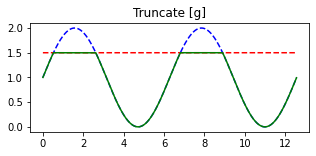

In [ ]:
fig = plt.figure(figsize=(5,2))
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yTrunc, 'g')
plt.title('Truncate [g]');

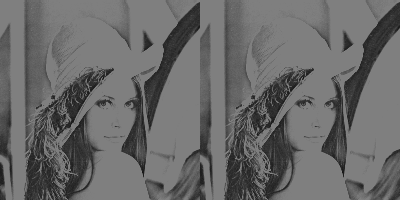

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_TRUNC)
imgThreshHW = np.copy(img)
imgThreshHW[img>=thresh] = thresh
show_more(200, imgThreshCV, imgThreshHW)

Thresholding – **Threshold to Zero & Inverted Threshold to Zero**

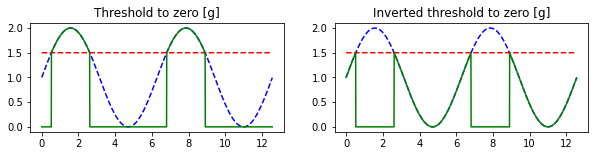

In [ ]:
fig = plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZero, 'g')
plt.title('Threshold to zero [g]')
plt.subplot(1,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZeroInv, 'g')
plt.title('Inverted threshold to zero [g]');

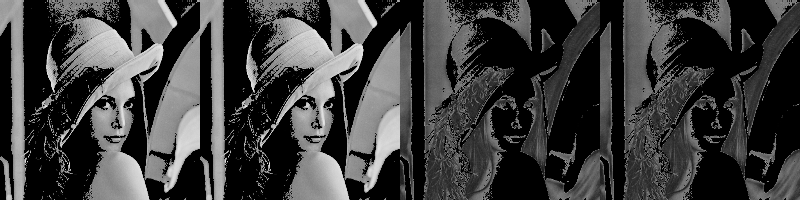

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_TOZERO)
_, imgThreshCV_inv = cv.threshold(img,thresh,max_value,cv.THRESH_TOZERO_INV)
imgThreshHW = np.copy(img)
imgThreshHW[img<=thresh] = 0
imgThreshHW_inv = np.copy(img)
imgThreshHW_inv[img>thresh] = 0

show_more(200, imgThreshCV, imgThreshHW, imgThreshCV_inv, imgThreshHW_inv)

Thresholding – **All together**

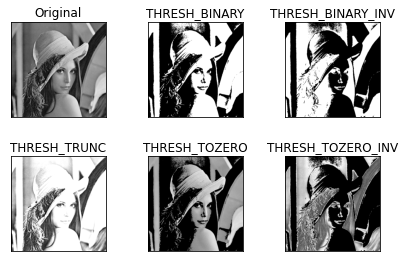

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC', \
          'THRESH_TOZERO','THRESH_TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout(pad=2.0)
plt.show()

## Batch file processing

Show all Flags in **./flags** folder 

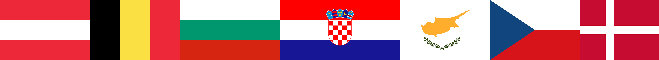

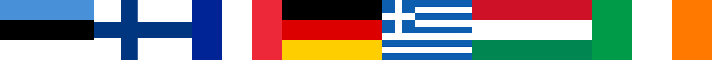

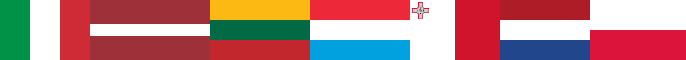

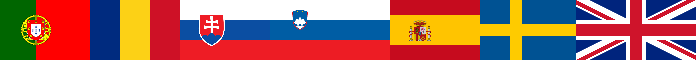

  0   flags/Austria.png
  1   flags/Belgium.png
  2   flags/Bulgaria.png
  3   flags/Croatia.png
  4   flags/Cyprus.png
  5   flags/Czech_Republic.png
  6   flags/Denmark.png
  7   flags/Estonia.png
  8   flags/Finland.png
  9   flags/France.png
 10   flags/Germany.png
 11   flags/Greece.png
 12   flags/Hungary.png
 13   flags/Ireland.png
 14   flags/Italy.png
 15   flags/Latvia.png
 16   flags/Lithuania.png
 17   flags/Luxembourg.png
 18   flags/Malta.png
 19   flags/Netherlands.png
 20   flags/Poland.png
 21   flags/Portugal.png
 22   flags/Romania.png
 23   flags/Slovakia.png
 24   flags/Slovenia.png
 25   flags/Spain.png
 26   flags/Sweden.png
 27   flags/United_Kingdom.png


In [ ]:
folderIn = 'flags'
exts = [f"{folderIn}/*.png"]
files = getFilenames(exts)

imgs = []
for fi in files:    
  imgs.append(cv.imread(fi))    

for idx in np.arange(0,len(imgs),7):
  show_more(60, *imgs[idx:idx+7])

files_with_num = [f"{idx:3.0f}   " + file for idx, file in zip(np.arange(len(files)), files)]
text = "\n".join(files_with_num)
print(text)

**Write a script for recoloring images in the selected folder**
* in all ***.png** images recolor the green pixels to white (255,255,255)
* save the new images to a subfolder (**\nG**)

**Use HSV color space rather than RGB color space**
* Hue **H** (color) (0° - 360°)
* Saturation **S** (saturation) (0% – 100%)
* Value **V** (brightness) (0% – 100%)

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/hsv.png)

flags/Austria.png


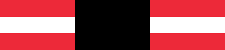

flags/Belgium.png


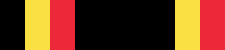

flags/Bulgaria.png


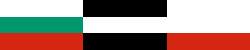

flags/Croatia.png


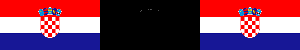

flags/Cyprus.png


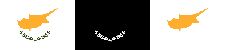

flags/Czech_Republic.png


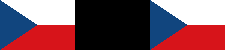

flags/Denmark.png


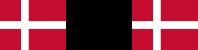

flags/Estonia.png


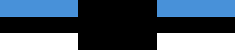

flags/Finland.png


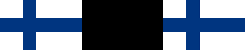

flags/France.png


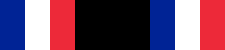

flags/Germany.png


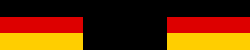

flags/Greece.png


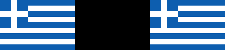

flags/Hungary.png


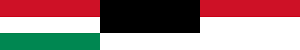

flags/Ireland.png


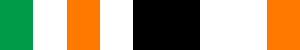

flags/Italy.png


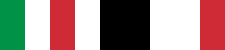

flags/Latvia.png


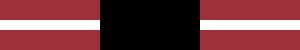

flags/Lithuania.png


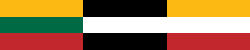

flags/Luxembourg.png


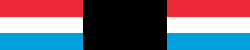

flags/Malta.png


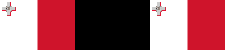

flags/Netherlands.png


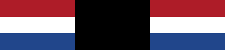

flags/Poland.png


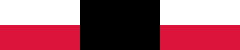

flags/Portugal.png


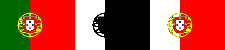

flags/Romania.png


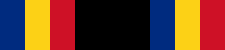

flags/Slovakia.png


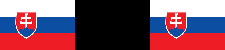

flags/Slovenia.png


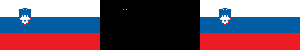

flags/Spain.png


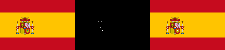

flags/Sweden.png


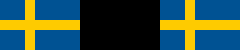

flags/United_Kingdom.png


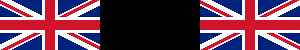

In [ ]:
def nogreen(img):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lower_green = np.array([36, 0, 0])
    upper_green = np.array([86, 255, 255])
    mask = cv.inRange(hsv, lower_green, upper_green)
    result = np.copy(img)
    result[mask == 255] = (255, 255, 255)
    return mask, result

folderIn = 'flags'
folderOut = 'nG'
exts = [f"{folderIn}/*.png"]
frames = getFilenames(exts)

if not os.path.exists(folderOut):
    os.mkdir(folderOut)

for frame in frames:
    print(frame)
    img = cv.imread(frame, cv.IMREAD_COLOR)
    mask, out = nogreen(img)
    show(cv.hconcat([img, cv.cvtColor(mask,cv.COLOR_GRAY2BGR), out]), height=50)
    fileName = frame[6:]
    cv.imwrite(f"{folderOut}/{fileName}", out)

## Work with video – Chroma key compositing (Green-Screen)

**Foreground:**

* Object / animal /  human before the green/blue screen

**Background:**
* Scene to change green background 

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/compositing0.png)

![Marvel](https://staff.utia.cas.cz/novozada/dizo/marvel0.png)

Image via [Marvel](https://www.marvel.com/)

![Weather](https://staff.utia.cas.cz/novozada/dizo/weather.png)

This is how it looks when you put on a green dress -  [here](https://www.mirror.co.uk/news/world-news/weather-forecaster-wardrobe-malfunction-presenter-825367).


**Work with video – help : read&write**
Write a script for transforming video to grayscale
* Video input – ***weather.mp4***
* Video output – ***weather_gray.mp4***


In [ ]:
vidIn = 'weather.mp4'
vidOut = 'weather_gray.mp4'
capIn = cv.VideoCapture(vidIn)
width  = int(capIn.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(capIn.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = capIn.get(cv.CAP_PROP_FPS)
fourcc = cv.VideoWriter_fourcc(*'mp4v')
videoOut = cv.VideoWriter(vidOut, fourcc, fps, (width, height), False)

while capIn.isOpened():
    ret, frame = capIn.read()
    if ret == True:
        gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
        videoOut.write(gray)
    else:
        break
capIn.release()
videoOut.release()

**Write a script for chroma key compositing**
* Green-screen video – ***weather.mp4***
* Background image – ***forecast.jpg***
* save the new video

In [ ]:
def greenScreen(imgF, imgB):
  imgB_ = imgB.copy()
  hsv = cv.cvtColor(imgF, cv.COLOR_BGR2HSV)
  lower_green = np.array([30, 50, 40])
  upper_green = np.array([86, 255, 255])
  mask = cv.inRange(hsv, lower_green, upper_green)
  imgF[mask != 0] = [0, 0, 0]
  imgB_[mask == 0] = [0, 0, 0]
  return imgF + imgB_

vid = 'weather.mp4'
background = 'forecast.jpg'
vidOut = 'weather_out.mp4'
cap = cv.VideoCapture(vid)
frameB = cv.imread(background)
width  = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

fourcc = cv.VideoWriter_fourcc(*'mp4v')
videoOut = cv.VideoWriter(vidOut, fourcc, fps, (width, height))
while cap.isOpened():
    ret, frameF = cap.read()    
    if ret == True:
        frame = greenScreen(frameF, frameB)
        videoOut.write(frame)               
    else:
        break
cap.release()
videoOut.release()


For the sake of speed, I had to lower the resolution, so the resulting quality is not great.

# Part 6: Fourier transform

**Jean-Baptiste Joseph Fourier**

👶 21 March 1768 – 💀 16 May 1830

* French mathematician and physicist born in Auxerre

![Joseph Fourier](https://staff.utia.cas.cz/novozada/dizo/fourier2.jpg)


## Discrete Fourier Transform (DFT)

$$
\begin{aligned}
X_k = \sum_{n=0}^{N-1} x_n\cdot e^{-2\pi ikn/N} =
\sum_{n=0}^{N-1} x_n[cos(2\pi kn/N)-i\cdot sin(2\pi kn/N) ]
\end{aligned}
$$
<br />

where
* $N$ = number of samples
* $n$ = current sample
* $k$ = current frequency, where $k\in[0, N−1]$
* $x_n$ = the sine value at sample n
* $X_k$ = DFT (amplitude and phase)

$$
\begin{aligned}
amplitude = \frac{|X_k|}{N}=\frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}
\end{aligned}
$$
<br />
$$
\begin{aligned}
phase = atan2(Im(X_k), Re(X_k))
\end{aligned}
$$

**Inverse Discrete Fourier Transform**
$$
\begin{aligned}
f_k = \frac{1}{N}\sum_{n=0}^{N-1} F_n\cdot e^{\frac{2\pi ink}{N}}
\end{aligned}
$$

* basic mathematical tool
* noise removal
* edge detection
* segmentation
* reconstruction
* etc.


Generate 3 sine waves:
* frequencies = {1, 4, 8}Hz
* amplitudes = {3, 1, 0.25}
* all phases = 0
Add this 3 sine waves together with a sampling rate 100 Hz

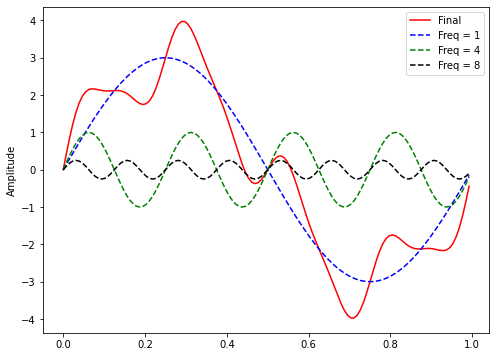

In [ ]:
sr = 128
ts = 1.0/sr
t = np.arange(0,1,ts)

freq1 = 1
x1 = 3*np.sin(2*np.pi*freq1*t)
freq2 = 4
x2 = np.sin(2*np.pi*freq2*t)
freq3 = 8   
x3 = 0.25* np.sin(2*np.pi*freq3*t)
x = x1 + x2 +x3

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r', label='Final')
plt.plot(t, x1, '--b', label=f'Freq = {freq1}')
plt.plot(t, x2, '--g', label=f'Freq = {freq2}')
plt.plot(t, x3, '--k', label=f'Freq = {freq3}')
plt.ylabel('Amplitude')
plt.legend(loc ="upper right");

plt.show()

Write a DFT(x) function


In [ ]:
def mydft(x):    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)    
    return X

Apply DFT to the signal we generated above and plot the result

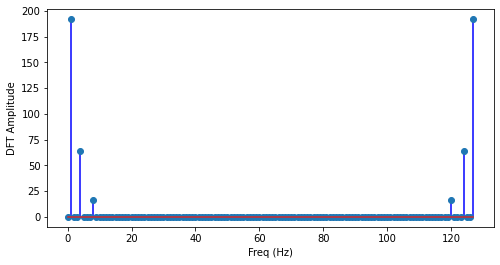

In [ ]:
X = mydft(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X), 'b')

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude')
plt.show();

Look at the first 10 frequencies

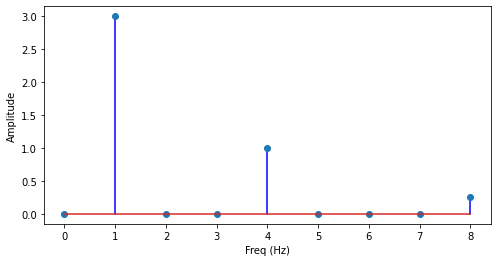

In [ ]:
first = range(0, 9)
plt.figure(figsize = (8, 4))
plt.stem(freq[first], abs(X[first]/(N//2)), 'b')

plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.show();

We see 3 clear peaks at the same frequencies with the same amplitudes as the individual signal components.

In [ ]:
sr_t = 2000
ts_t = 1.0/sr_t
t_t = np.arange(0,1,ts_t)

freq_t = 1.
x_t = 3*np.sin(2*np.pi*freq_t*t_t)
%timeit mydft(x_t)

1 loop, best of 5: 347 ms per loop


Not much, what do you think?

## Fast Fourier Transform (FFT)

*  an efficient algorithm to calculate the DFT
*  Cooley and Tukey in 1965
*  It reduces the complexity of the DFT from $𝑂(n^2)$ to $𝑂(n\log(n))$
Reminder:
$$
\begin{aligned}
X_k = \sum_{n=0}^{N-1} x_n\cdot e^{-2\pi ikn/N}
\end{aligned}
$$
<br />
$$
\begin{aligned}
X_{k+N} = \sum_{n=0}^{N-1} x_n\cdot e^{-2\pi i(k+N)n/N} =
\sum_{n=0}^{N-1} x_n\cdot e^{-2\pi in}\cdot e^{-2\pi ikn/N}  
\end{aligned}
$$
<br />
because of:
$$
\begin{aligned}
e^{-2\pi in} = 1
\end{aligned}
$$
<br />
$$
\begin{aligned}
X_{k+N} = \sum_{n=0}^{N-1} x_n\cdot e^{-2\pi ikn/N} = X_{k}
\end{aligned}
$$
we get finally:
$$
\begin{aligned}
X_{k+c\cdot N} = X_{k}
\end{aligned}
$$
for any integer $c$.

**Here comes the trick for FFT**
$$
\begin{aligned}
X_k = \sum_{m=0}^{N/2-1} x_{2m}\cdot e^{-2\pi ik(2m)/N} + 
\sum_{m=0}^{N/2-1} x_{2m+1}\cdot e^{-2\pi ik(2m+1)/N} =
\sum_{m=0}^{N/2-1} x_{2m}\cdot e^{-2\pi ikm/(N/2)} + 
e^{-2\pi ik/N}\sum_{m=0}^{N/2-1} x_{2m+1}\cdot e^{-2\pi ikm/(N/2)}
\end{aligned}
$$


How would it look in code?

In [ ]:
# x should have a length of power of 2 - in this case !!
def myfft(x):        
    N = len(x)    
    if N == 1:
        return x
    else:
        X_even = myfft(x[::2])        
        X_odd = myfft(x[1::2])        
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)   
        return X

Demonstrate on the same signal as the DFT

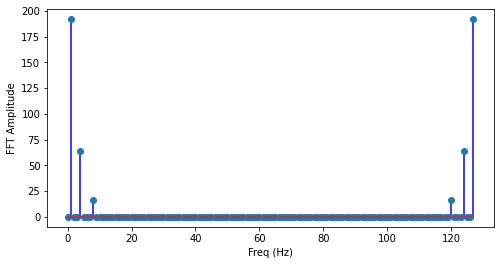

In [ ]:
X=myfft(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X), 'b', linefmt=None, markerfmt=None, basefmt=None)

plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.show();

Zoom the first part of the chart

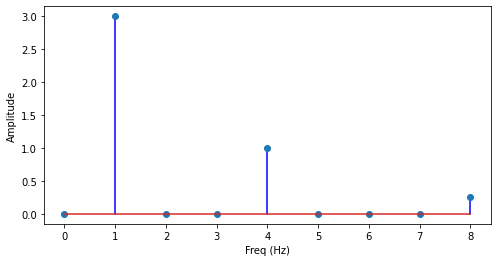

In [ ]:
first = range(0, 9)
plt.figure(figsize = (8, 4))
plt.stem(freq[first], abs(X[first]/(N//2)), 'b')

plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.show();

In [ ]:
sr_t = 2048
ts_t = 1.0/sr_t
t_t = np.arange(0,1,ts_t)

freq_t = 1.
x_t = 3*np.sin(2*np.pi*freq_t*t_t)
%timeit mydft(x_t)
%timeit myfft(x_t)

1 loop, best of 5: 358 ms per loop
10 loops, best of 5: 15.4 ms per loop


Well, it is worth it!

Reinventing the wheel? >> use NumPy or SciPy

In [ ]:
%timeit np.fft.fft(x_t)
%timeit scipy.fft(x_t)

The slowest run took 28.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 31.3 µs per loop
10000 loops, best of 5: 33.8 µs per loop


## FFT on Images

In [123]:
class FFTparts:
  def __init__(self, a):
    self.orig = a
    self.fft = np.fft.fftshift(np.fft.fft2(a))       
    self.ampl = np.log(np.abs(self.fft) + 1)
    self.phase = np.angle(self.fft)
    self.real = np.log(np.abs(np.real(self.fft)) + 1)
    self.imag = np.log(np.abs(np.imag(self.fft)) + 1)    

  def show(self, width=10, height=3):
    plt.figure(figsize=(width, height), constrained_layout=False)
    plt.subplot(231)
    plt.imshow(self.orig, "gray")
    plt.title("Original Image")
    plt.subplot(232)
    plt.imshow(self.ampl, "gray")
    plt.title("Amplitude")
    plt.subplot(233)
    plt.imshow(self.phase, "gray")
    plt.title("Phase")
    plt.subplot(234)
    plt.imshow(self.real, "gray")
    plt.title("Real part")
    plt.subplot(235)
    plt.imshow(self.imag, "gray")
    plt.title("Imag part")
    plt.show()
  
  def show_ampl(self, width=10, height=5):
    plt.figure(figsize=(width, height), constrained_layout=False)
    plt.subplot(121)
    plt.imshow(self.orig, "gray")
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(self.ampl, "gray")
    plt.title("Amplitude")    
    plt.show()

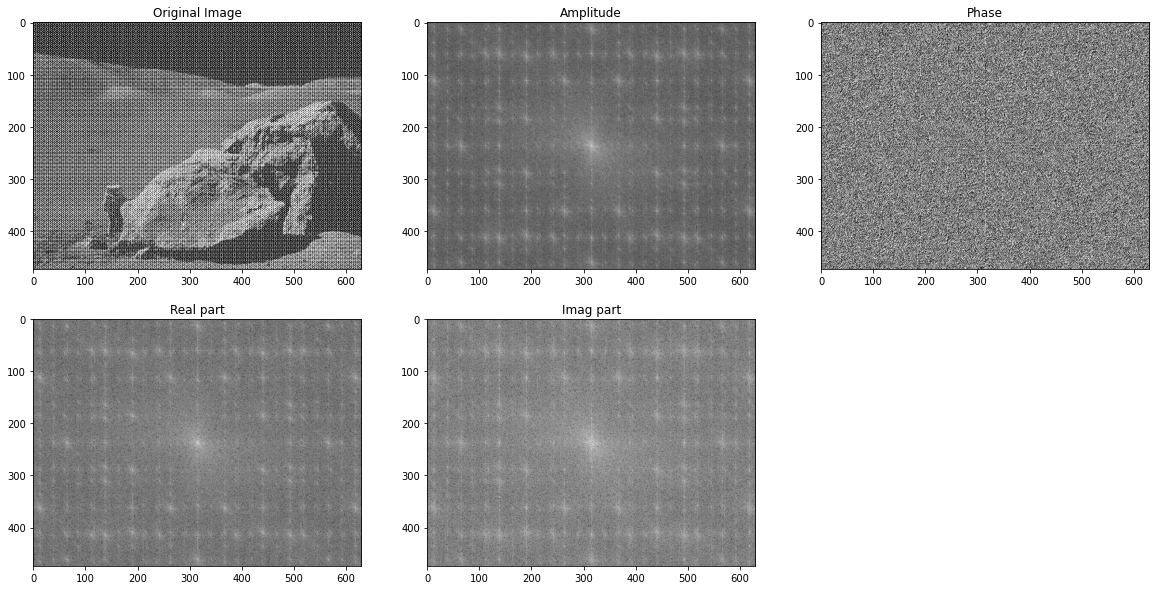

In [13]:
l = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
monntite = cv.cvtColor(cv.imread('moonlanding.png'), cv.COLOR_BGR2GRAY)
L = FFTparts(monntite)
L.show(20,10)

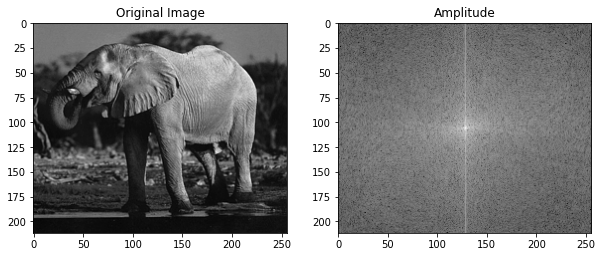

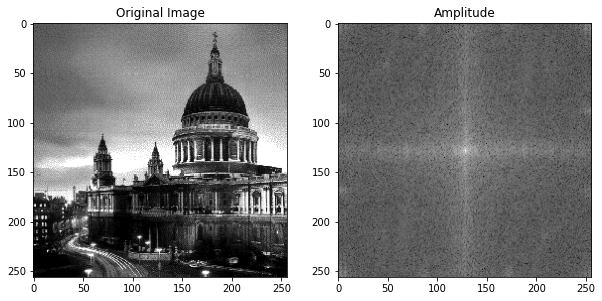

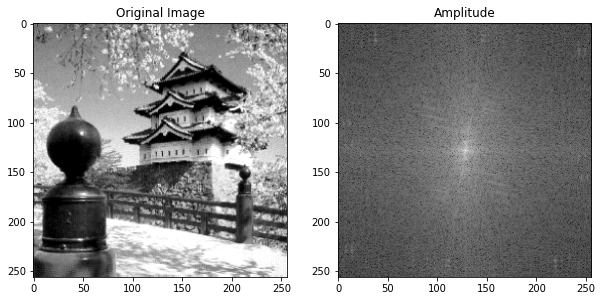

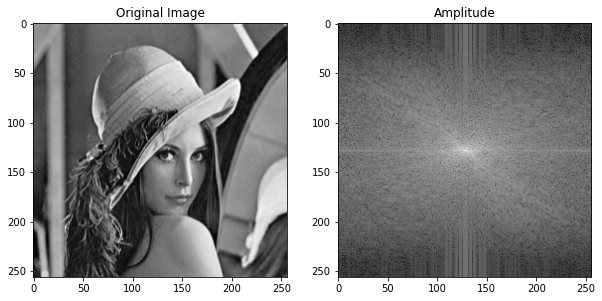

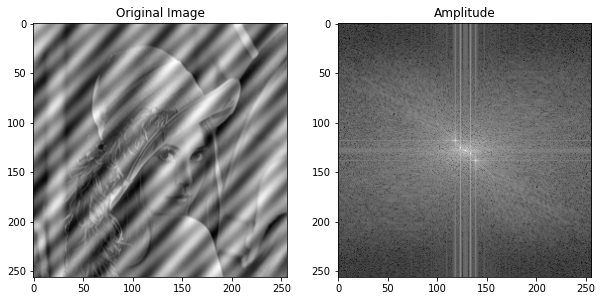

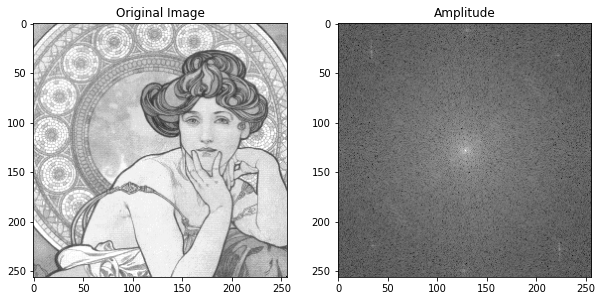

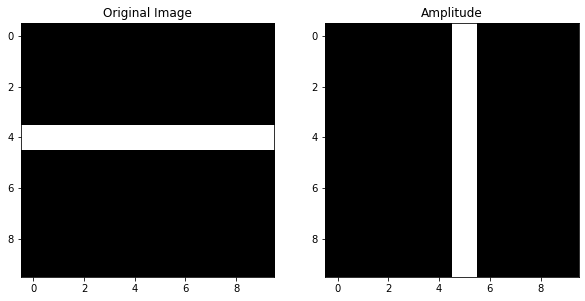

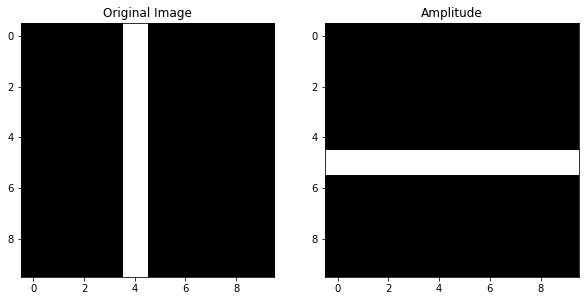

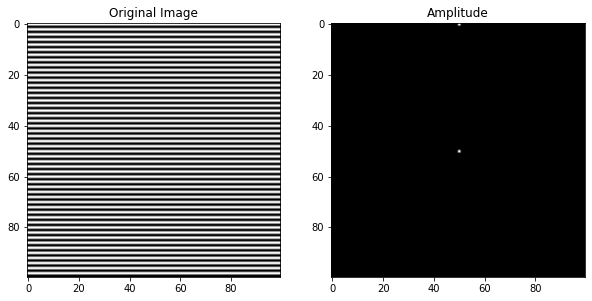

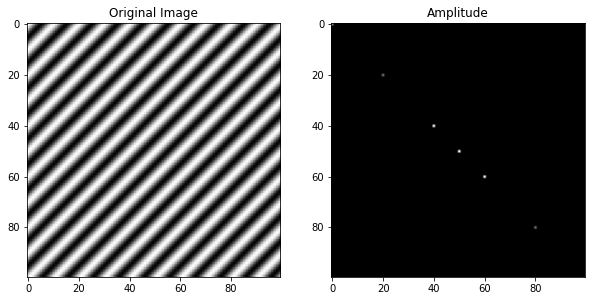

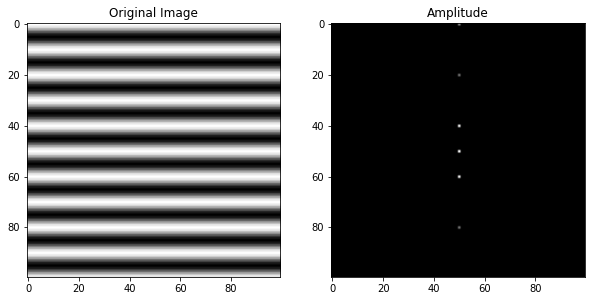

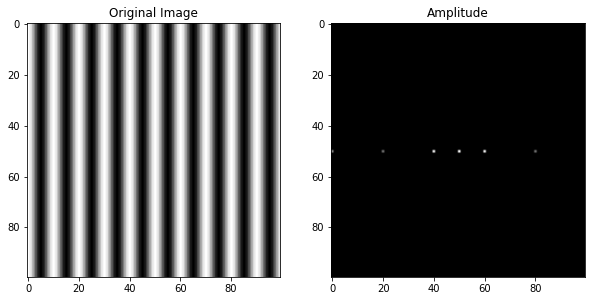

In [17]:
folderIn = 'fft'
exts = [f"{folderIn}/*.pgm"]
files = getFilenames(exts)

imgs = []
for fi in files:    
  imgs.append(cv.cvtColor(cv.imread(fi), cv.COLOR_BGR2GRAY))

for idx in np.arange(len(imgs)):
  F = FFTparts(imgs[idx])
  F.show_ampl(10,5)

Play with images

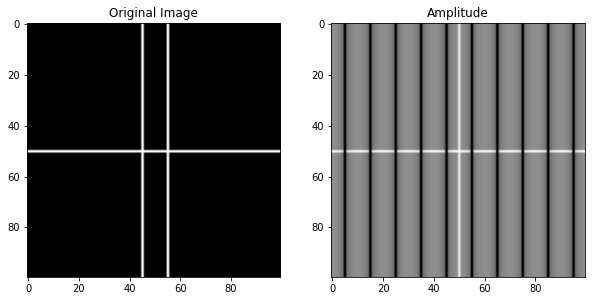

In [ ]:
a = np.zeros_like(imgs[8])
# a[:, 50] = 255
a[:, (45, 55)] = 255
a[50, :] = 255

F = FFTparts(a)
# F = FFTparts(imgs[10] +  a)
# F = FFTparts(imgs[9] +  imgs[10])
# F = FFTparts(imgs[9] +  np.rot90(imgs[9]))
# F = FFTparts(imgs[10] +  np.rot90(imgs[10]))
F.show_ampl(10,5)

What is **fft2**$(a)$ in $(0, 0)$ ?

$$
\begin{aligned}
X_0 = \sum_{n=0}^{N-1} x_n\cdot e^{-2\pi i0n/N} =
\sum_{n=0}^{N-1} x_n
\end{aligned}
$$

In [ ]:
f = imgs[0]
F = np.fft.fft2(f)
print(f'FFT in F[0, 0] = {F[0, 0]}')
print(f'Sum of all pixels = {np.sum(imgs[0])}')
print(f'F[0, 0] == sum(f)')

FFT in F[0, 0] = (4109962+0j)
Sum of all pixels = 4109962
F[0, 0] == sum(f)


Try to reconstruct image from its **amplitude**, **phase**, **real** and **imaginary** parts **only**

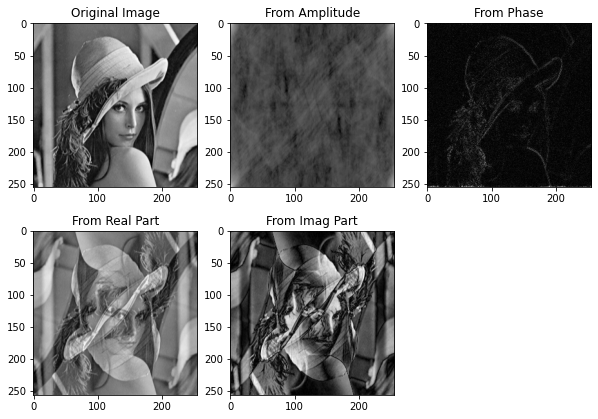

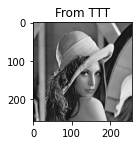

In [20]:
def ifft2_parts(f):
  F = np.fft.fft2(f)  
  ampl = np.abs(np.log(np.fft.ifft2(np.abs(F))+1))
  phase = np.abs(np.fft.ifft2(np.exp(1j * np.angle(F))))
  real = np.abs(np.fft.ifft2(np.real(F)))
  imag = np.abs(np.fft.ifft2(np.imag(F)))
  
  plt.figure(figsize=(10, 7), constrained_layout=False)
  plt.subplot(231)
  plt.imshow(f, "gray")
  plt.title("Original Image")
  plt.subplot(232)
  plt.imshow(ampl, "gray")
  plt.title("From Amplitude")
  plt.subplot(233)
  plt.imshow(phase, "gray")
  plt.title("From Phase")
  plt.subplot(234)
  plt.imshow(real, "gray")
  plt.title("From Real Part")
  plt.subplot(235)
  plt.imshow(imag, "gray")
  plt.title("From Imag Part")
  plt.show()
  plt.subplot(236)
  plt.imshow(np.abs(np.fft.ifft2(F)), "gray")
  plt.title("From TTT")
  plt.show()

f = imgs[3]
ifft2_parts(f)

Reconstruct the image from the two original images
1. combine the amplitude of $I_1$ the phase of $I_2$
2. combine the real part from $I_1$ and the imaginary part from $I_2$

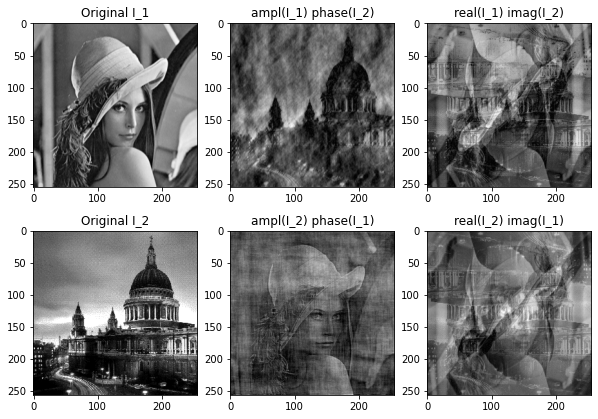

In [ ]:
def ifft2_parts2(f, g):  
  F = np.fft.fft2(f)  
  G = np.fft.fft2(g)  
  
  ap1 = np.abs(np.fft.ifft2(np.abs(F) * np.exp(1j * np.angle(G))))
  ap2 = np.abs(np.fft.ifft2(np.abs(G) * np.exp(1j * np.angle(F))))
  ri1 = np.abs(np.fft.ifft2(np.real(F) + (1j * np.imag(G))))
  ri2 = np.abs(np.fft.ifft2(np.real(G) + (1j * np.imag(F))))
  
  plt.figure(figsize=(10, 7), constrained_layout=False)
  plt.subplot(231)
  plt.imshow(f, "gray")
  plt.title("Original I_1")
  plt.subplot(232)
  plt.imshow(ap1, "gray")
  plt.title("ampl(I_1) phase(I_2)")
  plt.subplot(233)
  plt.imshow(ri1, "gray")
  plt.title("real(I_1) imag(I_2)")
  plt.subplot(234)
  plt.imshow(g, "gray")
  plt.title("Original I_2")  
  plt.subplot(235)
  plt.imshow(ap2, "gray")
  plt.title("ampl(I_2) phase(I_1)")
  plt.subplot(236)
  plt.imshow(ri2, "gray")
  plt.title("real(I_2) imag(I_1)")
  plt.show()

f = imgs[3]
g = imgs[1]
ifft2_parts2(f, g)

## Convolution

$$
\begin{aligned}
(f*g)(t) = \int_{-\infty}^\infty f(\tau)g(t-\tau)\;\mathrm{d}\tau
\end{aligned}
$$
<br />
$$
\begin{aligned}
(f*g)(n) = \sum_{m=-\infty}^\infty f(m)g(n-m)\
\end{aligned}
$$

Let's show a convolution on a 1d sinusoid with added random noise

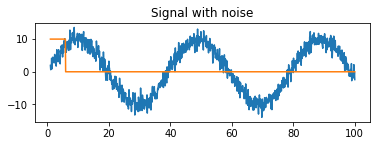

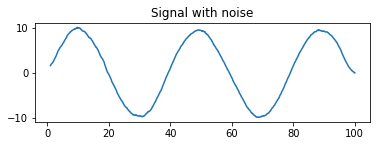

In [ ]:
x = np.linspace(1, 100, 1000)
f = 10*np.sin(x/(2*np.pi))
mean = 0.0
std = 1.5
noise = np.random.normal(mean, std, len(f))
# Noise up the original signal
f_noise = f + noise

g=np.ones(50)*10
gg = np.zeros(len(f))
gg[:len(g)] = g

plt.subplot(2,1,1)
plt.plot(x, f_noise)
plt.plot(x, gg)
plt.title('Signal with noise')
plt.show()

f_conv = np.convolve(f_noise,g,'same')

plt.subplot(2,1,1)
plt.plot(x, f_conv/np.sum(gg))
plt.title('Signal with noise')
plt.show()

## Signal filtering

Let's show filtering on a 1D example

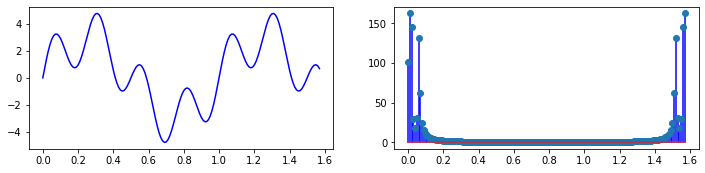

In [ ]:
t = np.arange(0,np.pi/2, 0.01 )
freq1 = 1
x1 = 3*np.sin(2*np.pi*freq1*t)
freq2 = 4
x2 = 2*np.sin(2*np.pi*freq2*t)
freq3 = 8   
f = x1 + x2

F = np.fft.fft(f)
plt.figure(figsize = (12, 12))
plt.subplot(421)
plt.plot(t, f, 'b')

plt.subplot(422)
plt.stem(t, abs(F), 'b');

*  Add random additive noise to the signal
*  Let's convert the signal to the frequency domain using FFT.
*  Then apply lowpass filtering and convert the data to the time domain.

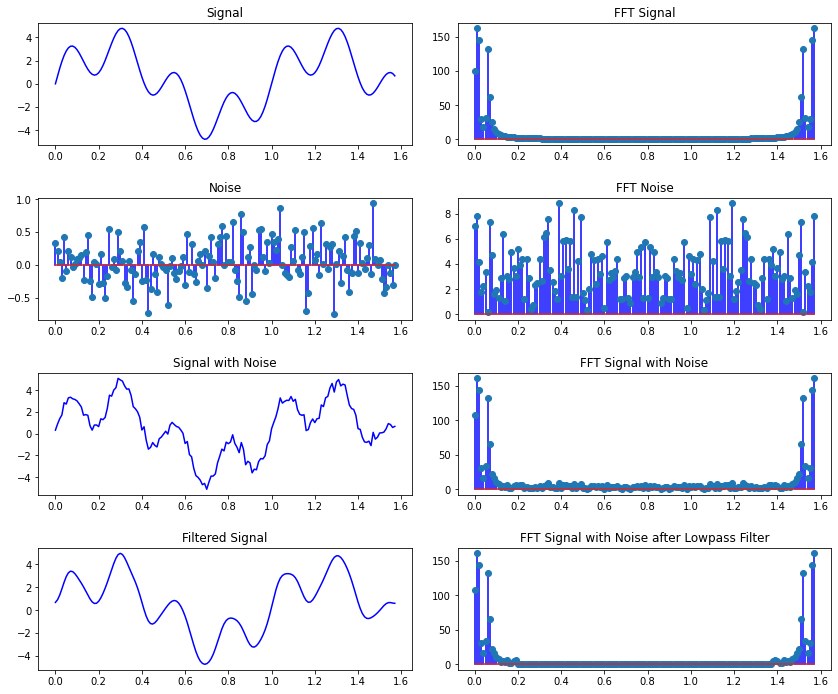

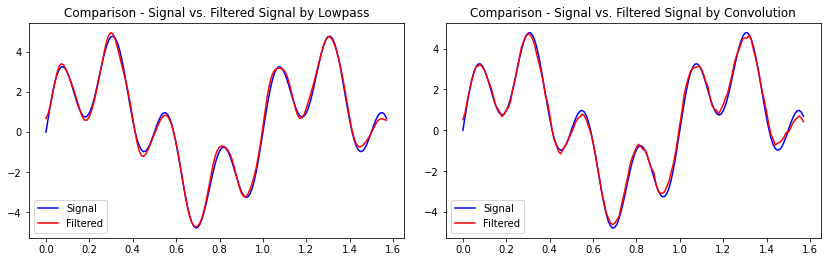

In [ ]:
t = np.arange(0,np.pi/2, 0.01 )
freq1 = 1
x1 = 3*np.sin(2*np.pi*freq1*t)
freq2 = 4
x2 = 2*np.sin(2*np.pi*freq2*t)
freq3 = 8   
f = x1 + x2

mean = 0.0
std = 0.3
noise = np.random.normal(mean, std, len(f))
# Noise up the original signal
f_noise = f + noise
F = np.fft.fft(f)
F_noise = np.fft.fft(f_noise)
N = np.fft.fft(noise)
lowpass = np.ones(len(t))
lowpass[20:-20] = 0
F_lowpass = F_noise * lowpass
f_filtered = np.fft.ifft(F_lowpass)

g=np.ones(5)
f_conv = np.convolve(f_noise,g,'same')/np.sum(g)

plt.figure(figsize = (12, 10))
plt.subplot(421)
plt.plot(t, f, 'b')
plt.title("Signal")
plt.subplot(422)
plt.stem(t, np.abs(F), 'b')
plt.title("FFT Signal")
plt.subplot(423)
plt.stem(t, noise, 'b')
plt.title("Noise")
plt.subplot(424)
plt.stem(t, np.abs(N), 'b')
plt.title("FFT Noise")
plt.subplot(425)
plt.plot(t, f_noise, 'b')
plt.title("Signal with Noise")
plt.subplot(426)
plt.stem(t, np.abs(F_noise), 'b')
plt.title("FFT Signal with Noise")
plt.subplot(427)
plt.plot(t, f_filtered, 'b')
plt.title("Filtered Signal")
plt.subplot(428)
plt.stem(t, np.abs(F_lowpass), 'b')
plt.title("FFT Signal with Noise after Lowpass Filter")
plt.tight_layout(pad=2.0)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(t, f, 'b', label=f'Signal')
plt.plot(t, f_filtered, 'r', label=f'Filtered')
plt.title("Comparison - Signal vs. Filtered Signal by Lowpass")
plt.legend(loc ="lower left");
plt.subplot(122)
plt.plot(t, f, 'b', label=f'Signal')
plt.plot(t, f_conv, 'r', label=f'Filtered')
plt.title("Comparison - Signal vs. Filtered Signal by Convolution")
plt.legend(loc ="lower left");
plt.tight_layout(pad=2.0)

Create a function to generate a circle - for masking the FT of image with **Lowpass** or **Highpass** filter

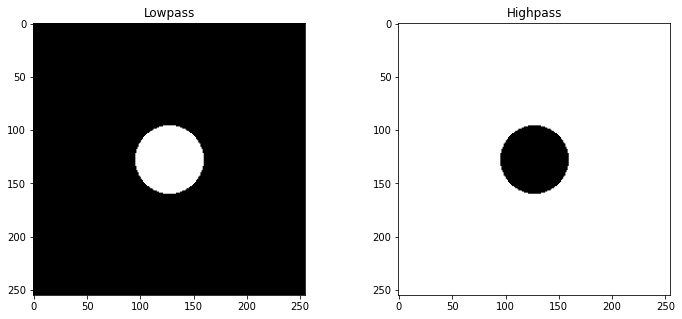

In [ ]:
def circle(r, n):
  # returns a binary circular mask of radius r in the matrix nxn
  coor = np.arange(-(n-1)/2,(n-1)/2)
  x, y = np.meshgrid(coor, coor)
  return (np.power(x,2) + np.power(y,2)) < np.power(r,2)

c = circle(32,256)
plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.imshow(c, "gray")
plt.title("Lowpass")
plt.subplot(122)
plt.imshow(np.invert(c), "gray")
plt.title("Highpass");

Write a function for Lowpass and Highpass filter + visualization

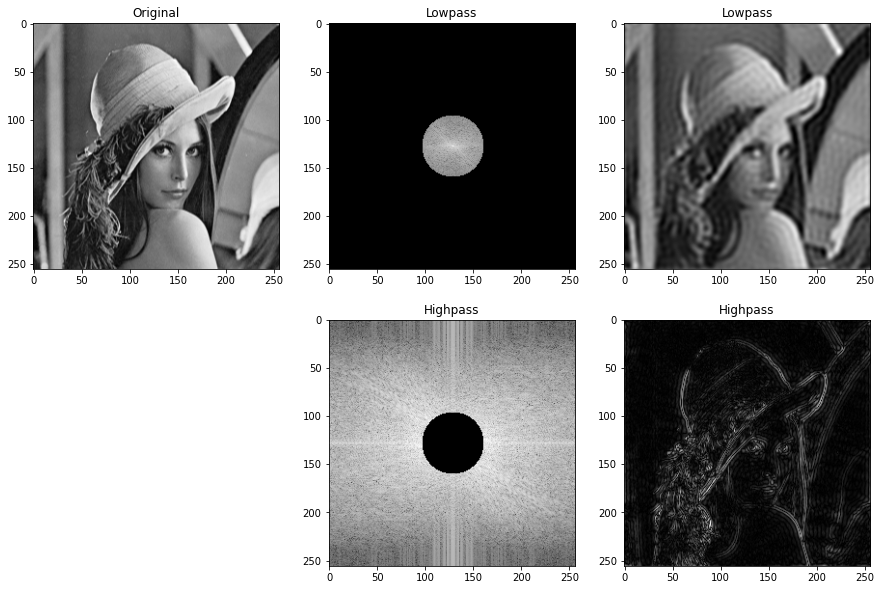

In [ ]:
def lowhighpass(f, r):
  F = np.fft.fft2(f)
  c = np.fft.fftshift(circle(r,f.shape[0]+1))
  Fl = F * c
  Fh = F * np.invert(c)
  low = np.abs(np.fft.ifft2(Fl))
  high = np.abs(np.fft.ifft2(Fh))

  plt.figure(figsize = (15, 10))
  plt.subplot(231)
  plt.imshow(f, "gray")
  plt.title("Original")
  plt.subplot(232)
  plt.imshow(np.fft.fftshift(np.log(np.abs(Fl)+1)), "gray")
  plt.title("Lowpass")
  plt.subplot(233)
  plt.imshow(low, "gray")
  plt.title("Lowpass")
  plt.subplot(235)
  plt.imshow(np.fft.fftshift(np.log(np.abs(Fh)+1)), "gray")
  plt.title("Highpass");
  plt.subplot(236)
  plt.imshow(high, "gray")
  plt.title("Highpass");

lowhighpass(imgs[3],32)

Try resetting the first and third quadrants of FFT and then the second and fourth

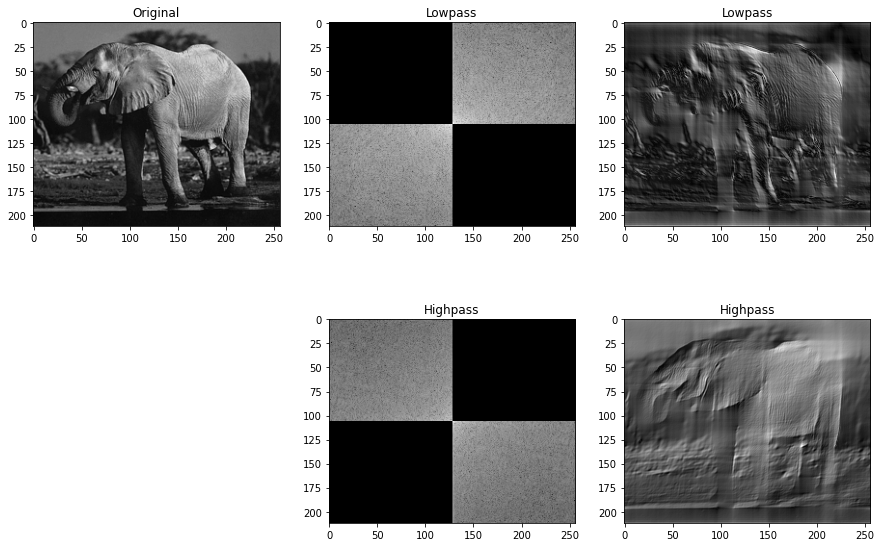

In [ ]:
def resetting(f):
  F = np.fft.fft2(f)
  r13 = np.zeros_like(f)
  r24 = np.zeros_like(f)  
  r13[:int(r13.shape[0]/2),int(r13.shape[1]/2):] = 1
  r13[int(r13.shape[0]/2):,:int(r13.shape[1]/2)] = 1
  r24[:int(r24.shape[0]/2),:int(r24.shape[1]/2)] = 1
  r24[int(r24.shape[0]/2):,int(r24.shape[1]/2):] = 1
  F13 = F * r13
  F24 = F * r24
  low = np.abs(np.fft.ifft2(F13))
  high = np.abs(np.fft.ifft2(F24))

  plt.figure(figsize = (15, 10))
  plt.subplot(231)
  plt.imshow(f, "gray")
  plt.title("Original")
  plt.subplot(232)
  plt.imshow(np.fft.fftshift(np.log(np.abs(F13)+1)), "gray")
  plt.title("Lowpass")
  plt.subplot(233)
  plt.imshow(low, "gray")
  plt.title("Lowpass")
  plt.subplot(235)
  plt.imshow(np.fft.fftshift(np.log(np.abs(F24)+1)), "gray")
  plt.title("Highpass");
  plt.subplot(236)
  plt.imshow(high, "gray")
  plt.title("Highpass");

resetting(imgs[0])

Remove wavelet damage from the image **fft/lenaripples.pgm**

In [124]:
Fp = FFTparts(imgs[4])
Fp.show_ampl()

NameError: ignored

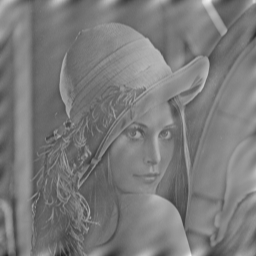

In [ ]:
F = np.fft.fft2(imgs[4])
F[1:15,1:15] = 0;
F[-15:-1,-15:-1] = 0;
cv2_imshow(np.abs(np.fft.ifft2(F)))

# Part 7: Homework

## ✍🏼 Homework 001.1 - work with pixels

Write a script that creates an image of a colored checkerboard like you see in the image below and then saves it as a PNG file.

![Ex101.1](https://staff.utia.cas.cz/novozada/dizo/ex1011a.png)

![Ex101.1](https://staff.utia.cas.cz/novozada/dizo/ex1011b.png)

In [ ]:
def colored_checkerboard(rows=3, cols=5, sc=10):
  # your code #  
  m = []
  return m

# call the colored_checkerboard()
# show the output
# save the output to png file

## ✍🏼 Homework 001.2

Remove the periodic noise by filtering in the frequency domain from this figure:

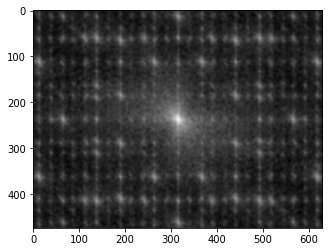

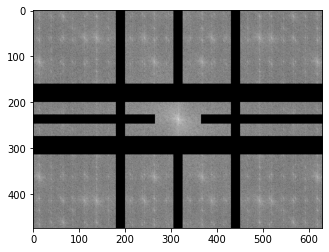

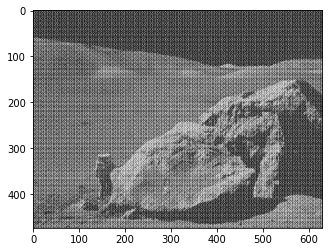

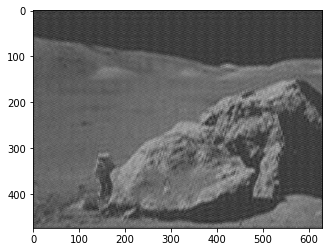

In [182]:
img = cv.imread('moonlanding.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_fft = np.fft.fftshift(np.fft.fft2(img_gray))       
img_ampl = np.log(np.abs(img_fft) + 1)
img_phase = np.angle(img_fft);
blurred = cv.GaussianBlur(img_ampl, (11, 11), 0)
ret,thresh = cv.threshold(blurred,254,255,cv.THRESH_TRUNC)

height = img_ampl.shape[0]
width = img_ampl.shape[1]

for i in range(0, height-0):
#  for j in range(5,25):
#    img_ampl[i][j] = 0
  for j in range(180,200):
    img_ampl[i][j] = 0
#  for j in range(130,150):
#    img_ampl[i][j] = 0
  for j in range(width - 200,width - 180):
    img_ampl[i][j] = 0
#  for j in range(width - 150,width - 130):
#    img_ampl[i][j] = 0
#  for j in range(width - 25,width - 5):
#    img_ampl[i][j] = 0

for j in range(0, width - 0):
#  for i in range(5,25):
#    img_ampl[i][j] = 0
#  for i in range(50,70):
#    img_ampl[i][j] = 0
#  for i in range(100,120):
#    img_ampl[i][j] = 0
  for i in range(160,200):
    img_ampl[i][j] = 0
#  for i in range(height-70,height-50):
#    img_ampl[i][j] = 0
#  for i in range(height-120,height-100):
#    img_ampl[i][j] = 0
#  for i in range(height-25,height-5):
#    img_ampl[i][j] = 0
  for i in range(height-200,height-160):
    img_ampl[i][j] = 0

for i in range(height//2 - 10, height//2 + 10):
  for j in range(0,width//2 - 50):
    img_ampl[i][j] = 0
  for j in range(width//2 + 50,width):
    img_ampl[i][j] = 0

for j in range(width//2 - 10, width//2 + 10):
  for i in range(0,height//2 - 50):
    img_ampl[i][j] = 0
  for i in range(height//2 + 50,height):
    img_ampl[i][j] = 0

#for i in range(0, img_ampl.shape[0]):
#  for j in range(0,img_ampl.shape[1]):
#    img_ampl[i][j] = 0

#img_new = np.fft.ifft2(np.fft.fftshift(img_ampl));
img_new = np.abs(np.fft.ifft2(np.exp(img_ampl - 1) * np.exp(1j * np.angle(img_fft))))
plt.imshow(thresh, "gray")
plt.show()
plt.imshow(img_ampl, "gray")
plt.show()
plt.imshow(img_gray, "gray")
plt.show()
plt.imshow(img_new, "gray")
plt.show()
#cv2_imshow(img)

**<font color='red'>Simple lowpass filtering is not enough, you need to mask out all the bright spots of the FFT outside the center.</font>**

In [ ]:
def remove_noise(f):
  # your code # 
  m = [] 
  return m

# load the image 'moonlanding.png'
# call the remove_noise()